In [1]:
!git clone https://github.com/ritusingla/deep-image-prior
!mv deep-image-prior/* ./

Cloning into 'deep-image-prior'...
remote: Enumerating objects: 250, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (206/206), done.
remote: Total 558 (delta 78), reused 155 (delta 43), pack-reused 308
Receiving objects: 100% (558/558), 273.77 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (241/241), done.


# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os

import numpy as np
from models import *

import torch
import torch.optim

from skimage.measure import compare_psnr
from utils.denoising_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True
sigma = 25
sigma_ = sigma/255.

In [0]:
fname = 'data/denoising/F16_GT.png'

# Load image

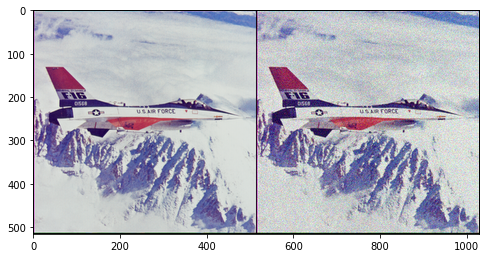

In [4]:
# Add synthetic noise
img_pil = crop_image(get_image(fname, imsize)[0], d=32)
img_np = pil_to_np(img_pil)
    
img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma_)
    
if PLOT:
  plot_image_grid([img_np, img_noisy_np], 10, 6);
else:
  assert False

# Setup

In [5]:
INPUT = 'noise' # 'meshgrid'
pad = 'reflection'
OPT_OVER = 'net' # 'net,input'

reg_noise_std = 1./30. # set to 1./20. for sigma=50
LR = 0.01

OPTIMIZER='adam' # 'LBFGS'
show_every = 100
exp_weight=0.99

num_iter = 3000
input_depth = 32 
figsize = 4 
    
    
net = get_net(input_depth, 'skip', pad,
                  skip_n33d=128, 
                  skip_n33u=128, 
                  skip_n11=4, 
                  num_scales=5,
                  upsample_mode='bilinear').type(dtype)
    
net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0])).type(dtype).detach()

# Compute number of parameters
s  = sum([np.prod(list(p.size())) for p in net.parameters()]); 
print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_noisy_torch = np_to_torch(img_noisy_np).type(dtype)

Number of params: 2217831


# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_

Iteration 00000    Loss 0.081399   PSNR_noisy: 10.893834   PSRN_gt: 11.375177 PSNR_gt_sm: 11.375177

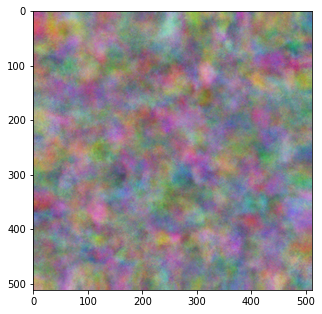

Iteration 00100    Loss 0.018610   PSNR_noisy: 17.302646   PSRN_gt: 20.189083 PSNR_gt_sm: 16.832174

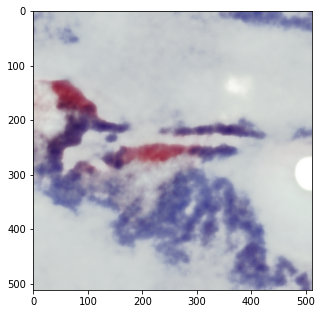

Iteration 00200    Loss 0.014995   PSNR_noisy: 18.240649   PSRN_gt: 22.256228 PSNR_gt_sm: 20.905958

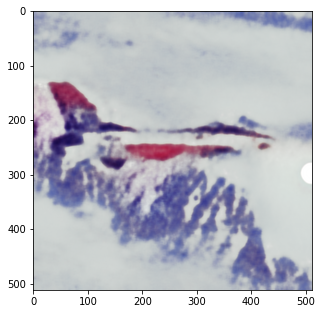

Iteration 00300    Loss 0.013409   PSNR_noisy: 18.726025   PSRN_gt: 23.595935 PSNR_gt_sm: 23.274130

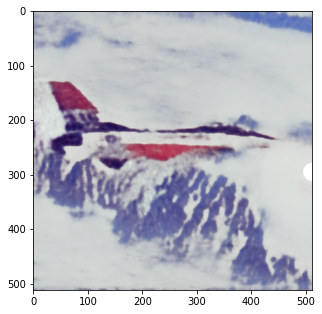

Iteration 00400    Loss 0.012343   PSNR_noisy: 19.085934   PSRN_gt: 24.807401 PSNR_gt_sm: 24.843303

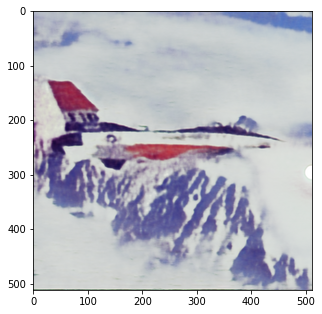

Iteration 00500    Loss 0.011877   PSNR_noisy: 19.252828   PSRN_gt: 25.474285 PSNR_gt_sm: 26.110431

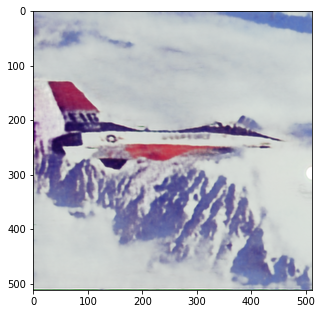

Iteration 00600    Loss 0.011490   PSNR_noisy: 19.396675   PSRN_gt: 26.075350 PSNR_gt_sm: 26.910517

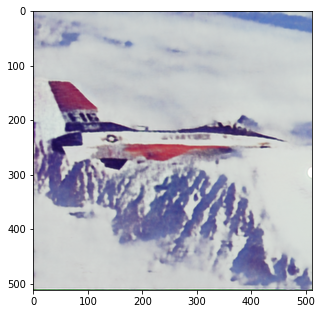

Iteration 00700    Loss 0.011190   PSNR_noisy: 19.511724   PSRN_gt: 26.587922 PSNR_gt_sm: 27.539465

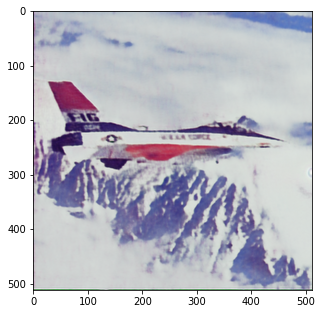

Iteration 00800    Loss 0.010787   PSNR_noisy: 19.670907   PSRN_gt: 27.540786 PSNR_gt_sm: 28.425152

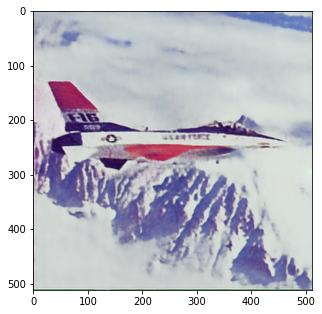

Iteration 00900    Loss 0.010548   PSNR_noisy: 19.768138   PSRN_gt: 28.077178 PSNR_gt_sm: 29.216898

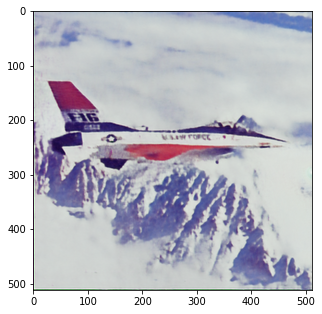

Iteration 01000    Loss 0.010436   PSNR_noisy: 19.814600   PSRN_gt: 28.415664 PSNR_gt_sm: 29.769453

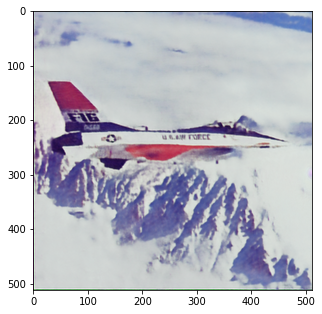

Iteration 01100    Loss 0.010299   PSNR_noisy: 19.872105   PSRN_gt: 28.745944 PSNR_gt_sm: 30.206728

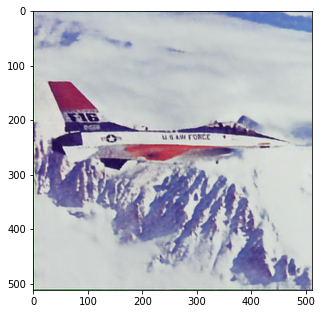

Iteration 01200    Loss 0.010254   PSNR_noisy: 19.890948   PSRN_gt: 28.830675 PSNR_gt_sm: 30.588528

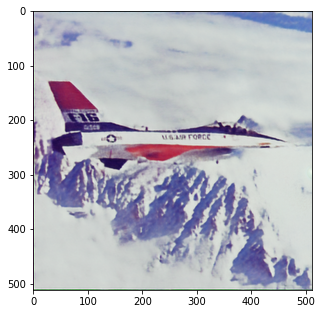

Iteration 01300    Loss 0.010100   PSNR_noisy: 19.956709   PSRN_gt: 29.288869 PSNR_gt_sm: 30.920393

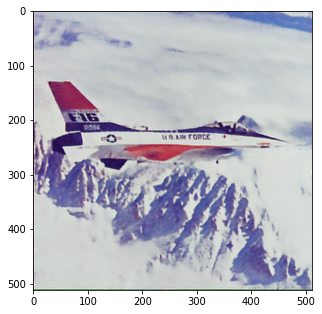

Iteration 01400    Loss 0.010001   PSNR_noisy: 19.999432   PSRN_gt: 29.574206 PSNR_gt_sm: 31.223483

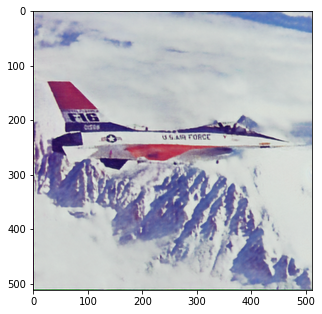

Iteration 01500    Loss 0.009958   PSNR_noisy: 20.018238   PSRN_gt: 29.638532 PSNR_gt_sm: 31.479254

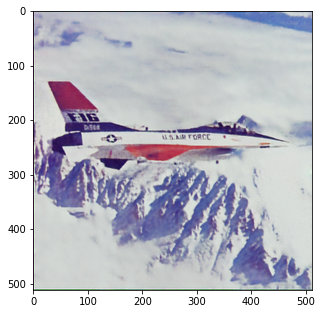

Iteration 01600    Loss 0.009858   PSNR_noisy: 20.062079   PSRN_gt: 29.980898 PSNR_gt_sm: 31.700473

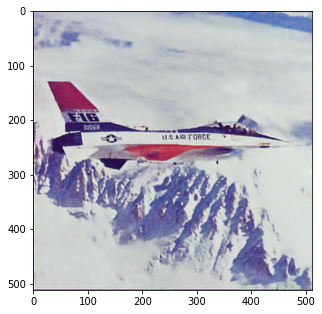

Iteration 01700    Loss 0.009787   PSNR_noisy: 20.093650   PSRN_gt: 30.149019 PSNR_gt_sm: 31.896931

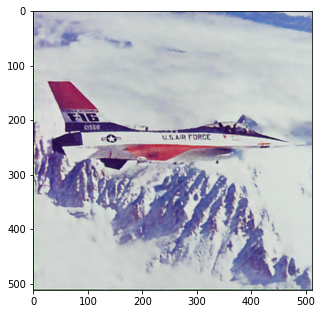

Iteration 01800    Loss 0.009763   PSNR_noisy: 20.104267   PSRN_gt: 30.179599 PSNR_gt_sm: 32.057145

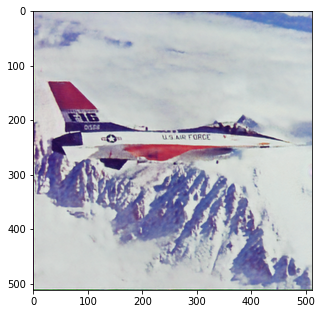

Iteration 01900    Loss 0.009731   PSNR_noisy: 20.118566   PSRN_gt: 30.114709 PSNR_gt_sm: 32.193237

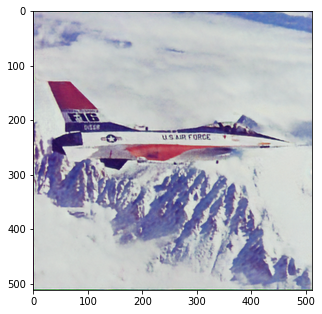

Iteration 02000    Loss 0.009638   PSNR_noisy: 20.160242   PSRN_gt: 30.388976 PSNR_gt_sm: 32.312517

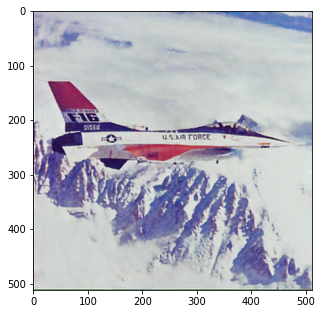

Iteration 02100    Loss 0.009560   PSNR_noisy: 20.195374   PSRN_gt: 30.604073 PSNR_gt_sm: 32.408105

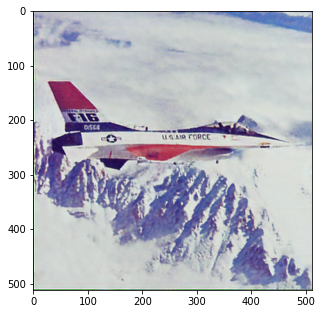

Iteration 02200    Loss 0.009540   PSNR_noisy: 20.204713   PSRN_gt: 30.564269 PSNR_gt_sm: 32.483044

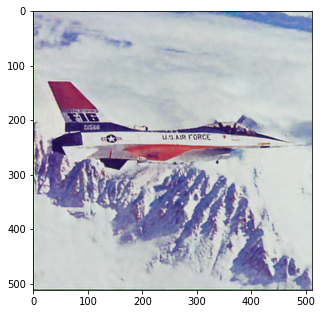

Iteration 02300    Loss 0.009521   PSNR_noisy: 20.212960   PSRN_gt: 30.344692 PSNR_gt_sm: 32.543758

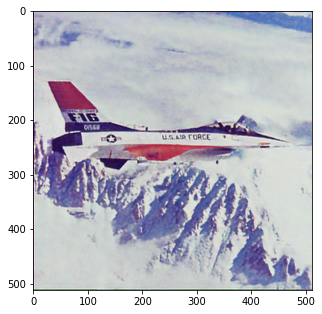

Iteration 02400    Loss 0.009461   PSNR_noisy: 20.240596   PSRN_gt: 30.451709 PSNR_gt_sm: 32.580568

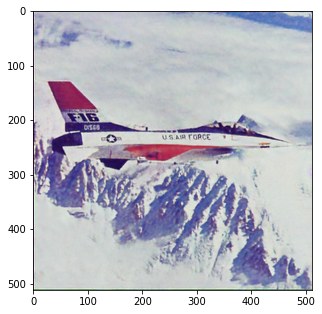

Iteration 02500    Loss 0.009367   PSNR_noisy: 20.283999   PSRN_gt: 30.638750 PSNR_gt_sm: 32.598303

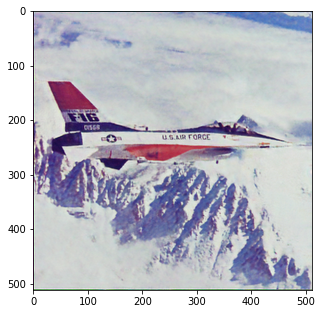

Iteration 02600    Loss 0.009330   PSNR_noisy: 20.301365   PSRN_gt: 30.483789 PSNR_gt_sm: 32.599905

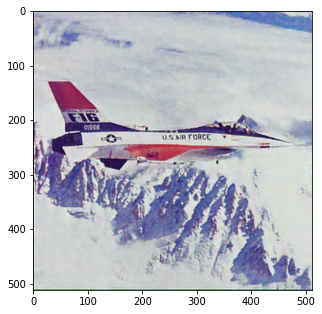

Iteration 02700    Loss 0.009320   PSNR_noisy: 20.305795   PSRN_gt: 30.314478 PSNR_gt_sm: 32.577656

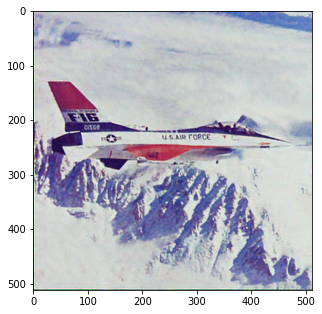

Iteration 02800    Loss 0.009223   PSNR_noisy: 20.351170   PSRN_gt: 30.517576 PSNR_gt_sm: 32.543948

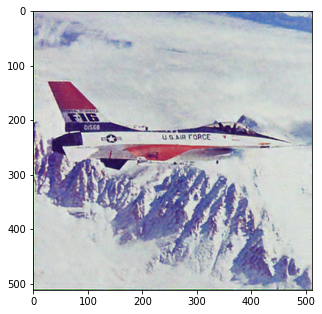

Iteration 02900    Loss 0.009180   PSNR_noisy: 20.371571   PSRN_gt: 30.370176 PSNR_gt_sm: 32.488627

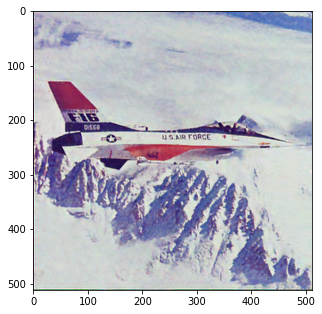

In [6]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
out_avg = None
last_net = None
psrn_noisy_last = 0
loss=[]
p_n=[]
p_gt=[]
p_gt_sm=[]
acc=[]
i = 0
def closure():
    
    global i, out_avg, psrn_noisy_last, last_net, net_input,loss,p_n,p_gt,p_gt_sm,acc
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
    
    # Smoothing
    if out_avg is None:
        out_avg = out.detach()
    else:
        out_avg = out_avg * exp_weight + out.detach() * (1 - exp_weight)
            
    total_loss = mse(out, img_noisy_torch)
    total_loss.backward()
    loss=np.append(loss,total_loss.item())
    l=total_loss.item()
    a= 100-(l*1000)
    acc= np.append(acc,a)
    psrn_noisy = compare_psnr(img_noisy_np, out.detach().cpu().numpy()[0]) 
    psrn_gt    = compare_psnr(img_np, out.detach().cpu().numpy()[0]) 
    psrn_gt_sm = compare_psnr(img_np, out_avg.detach().cpu().numpy()[0]) 
    p_n=np.append(p_n,psrn_noisy)
    p_gt=np.append(p_gt,psrn_noisy)
    p_gt_sm=np.append(p_gt_sm,psrn_gt_sm)
    
    # Note that we do not have GT for the "snail" example
    # So 'PSRN_gt', 'PSNR_gt_sm' make no sense
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        print ('Iteration %05d    Loss %f   PSNR_noisy: %f   PSRN_gt: %f PSNR_gt_sm: %f' % (i, total_loss.item(), psrn_noisy, psrn_gt, psrn_gt_sm), sep='\r', end='')
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
        
    
    # Backtracking
    if i % show_every:
        if psrn_noisy - psrn_noisy_last < -5: 
            print('Falling back to previous checkpoint.')

            for new_param, net_param in zip(last_net, net.parameters()):
                net_param.data.copy_(new_param.cuda())

            return total_loss*0
        else:
            last_net = [x.detach().cpu() for x in net.parameters()]
            psrn_noisy_last = psrn_noisy
            
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


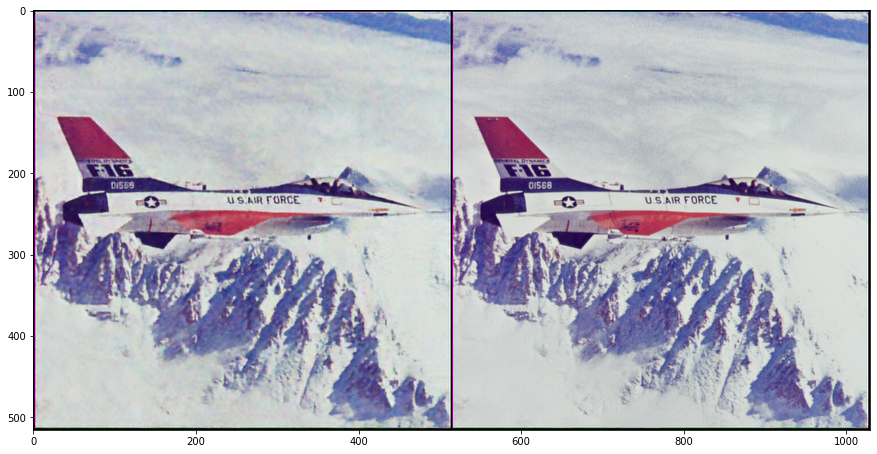

In [7]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_np], factor=13);

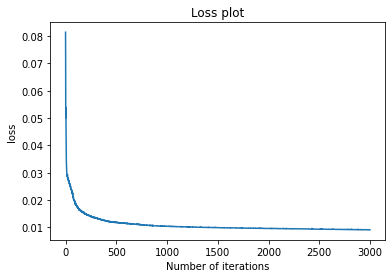

In [8]:
plt.title('Loss plot')
plt.xlabel('Number of iterations')
plt.ylabel('loss')
plt.plot(loss)
plt.show()


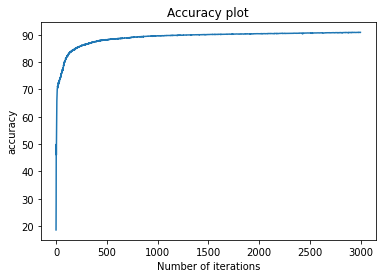

In [9]:
plt.xlabel('Number of iterations')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.plot(acc)
plt.show()


### **Detail Color Enhancement**

In [10]:

!apt install caffe-cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  caffe-tools-cuda cython3 fonts-lyx javascript-common libblosc1
  libcaffe-cuda1 libcublas9.1 libcudart9.1 libcurand9.1 libgflags2.2
  libgoogle-glog0v5 libjs-jquery libjs-jquery-ui libleveldb1v5 liblmdb0
  python-matplotlib-data python-tables-data python3-bs4 python3-caffe-cuda
  python3-chardet python3-cycler python3-dateutil python3-decorator
  python3-gflags python3-h5py python3-html5lib python3-ipython
  python3-ipython-genutils python3-leveldb python3-lxml python3-matplotlib
  python3-networkx python3-nose python3-numexpr python3-olefile python3-pandas
  python3-pandas-lib python3-pexpect python3-pickleshare python3-pil
  python3-pkg-resources python3-prompt-toolkit python3-protobuf
  python3-ptyprocess python3-pygments python3-pyparsing python3-pywt
  python3-scipy python3-simplegeneric python3-six python3-skimage
  python3-skimage

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import caffe
import os
import skimage.color as color
import scipy.ndimage.interpolation as sni

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
!wget -O models/colorization_release_v1.caffemodel http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel

--2020-05-31 12:56:31--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel [following]
--2020-05-31 12:56:31--  https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128948189 (123M)
Saving to: ‘models/colorization_release_v1.caffemodel’

models/colorization 100%[===================

In [0]:
gpu_id = 0
caffe.set_mode_gpu()
caffe.set_device(gpu_id)
net = caffe.Net('models/colorization_deploy_v1.prototxt', 'models/colorization_release_v1.caffemodel', caffe.TEST)

(H_in,W_in) = net.blobs['data_l'].data.shape[2:] # get input shape
(H_out,W_out) = net.blobs['class8_ab'].data.shape[2:] # get output shape
net.blobs['Trecip'].data[...] = 6/np.log(10) # 1/T, set annealing temperature
    # (We found that we had introduced a factor of log(10). We will update the arXiv shortly.)

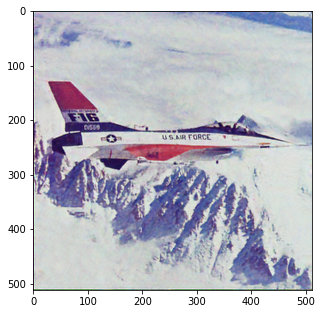

In [14]:
plot_image_grid([out_np], factor=4, nrow=1);
plt.show()

In [0]:
net.forward() # run network

out = net.blobs['class8_ab'].data[0,:,:,:].transpose((1,2,0)) # this is our result
norm=0.07

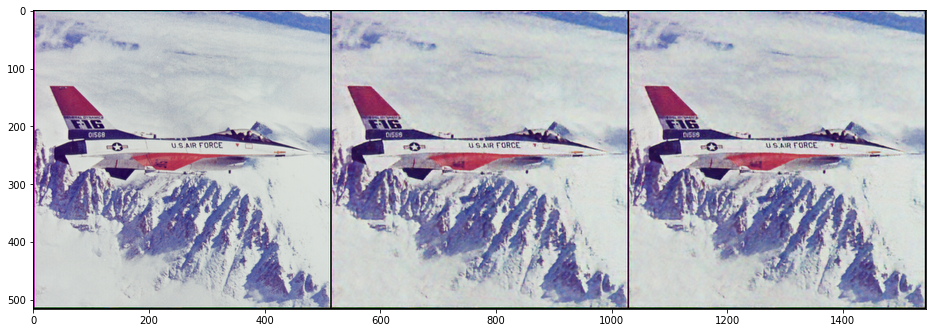

In [23]:
out= out_np
out_np+=norm
plot_image_grid([img_np, np.clip(out_np, 0, 1),out],factor=13, nrow=3);
plt.show()